In [1]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Reading Data
data = pd.read_csv("Iris.csv", index_col = 'Id')

X = data.drop('Species', axis = 1).to_numpy()
Y, mapping = pd.factorize(data.Species)

scaler = StandardScaler()
X = scaler.fit_transform(X)

## 1. Number of Cluster (K)
### Elbow Method
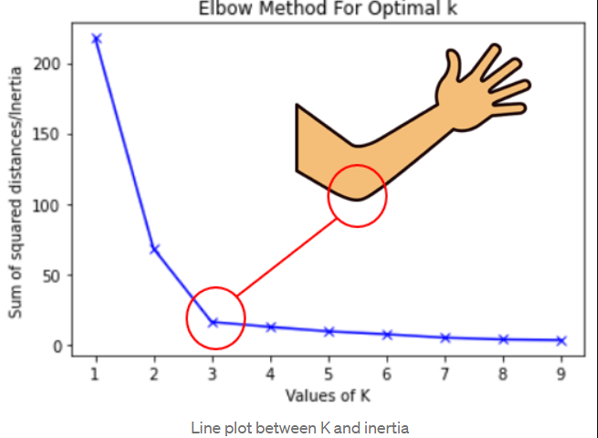

In [12]:
scores = []
for k in range(1,10):
    model = KMeans(n_clusters=k, random_state=99)
    model.fit(X)

    scores.append(model.inertia_)
    del model
    

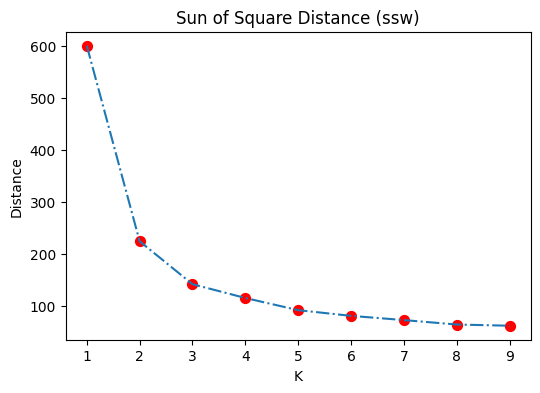

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(range(1,10), scores, '-.')
plt.scatter(range(1,10), scores, s=50, marker='o', c='red')

plt.title("Sun of Square Distance (ssw)")
plt.xlabel("K")
plt.ylabel("Distance")

plt.show()

## 2. Centroid Initialization

### Random/ Frogy Initialization

Forgy initialization is the simplest method of cluster centroid initialization. In Forgy initialization, we pick the random _K_ points from the available data points and assign them as a cluster centroids.

In [14]:
model = KMeans(n_clusters=3, init="random", random_state=99)
model.fit(X)

KMeans(init='random', n_clusters=3, random_state=99)

In [15]:
model.inertia_

140.96581663074699

### _K_-Means++

The _K_-Means++ is the popular centroid initialization method. This algorithm carefully selects the initial centroids for _K_-Means clustering. It follows a simple probability-based approach where the first centroid is selected at random and after that, the squared distance is calculated for all the data points with that centroid. For the next centroid, a data point that has the largest distance has the highest probability of being selected. This selection is decided based on a weighted probability score which we will also see in the code snippet below. The selection is continued until we have _K_ centroids, and then _K_-Means clustering is done using these centroids.


**Algorithm KMeans++**

1. Initialize _K_ and pick first initial centroid at random from the dataset.
2. Calculate distance from the first centroid to all data points.
3. Pick next centroid which is farthest from the first centroid using some weighted probability score.
4. Repeat 2-3 until _K_ clusters reached.

<div align="center">
    <figure>
<p>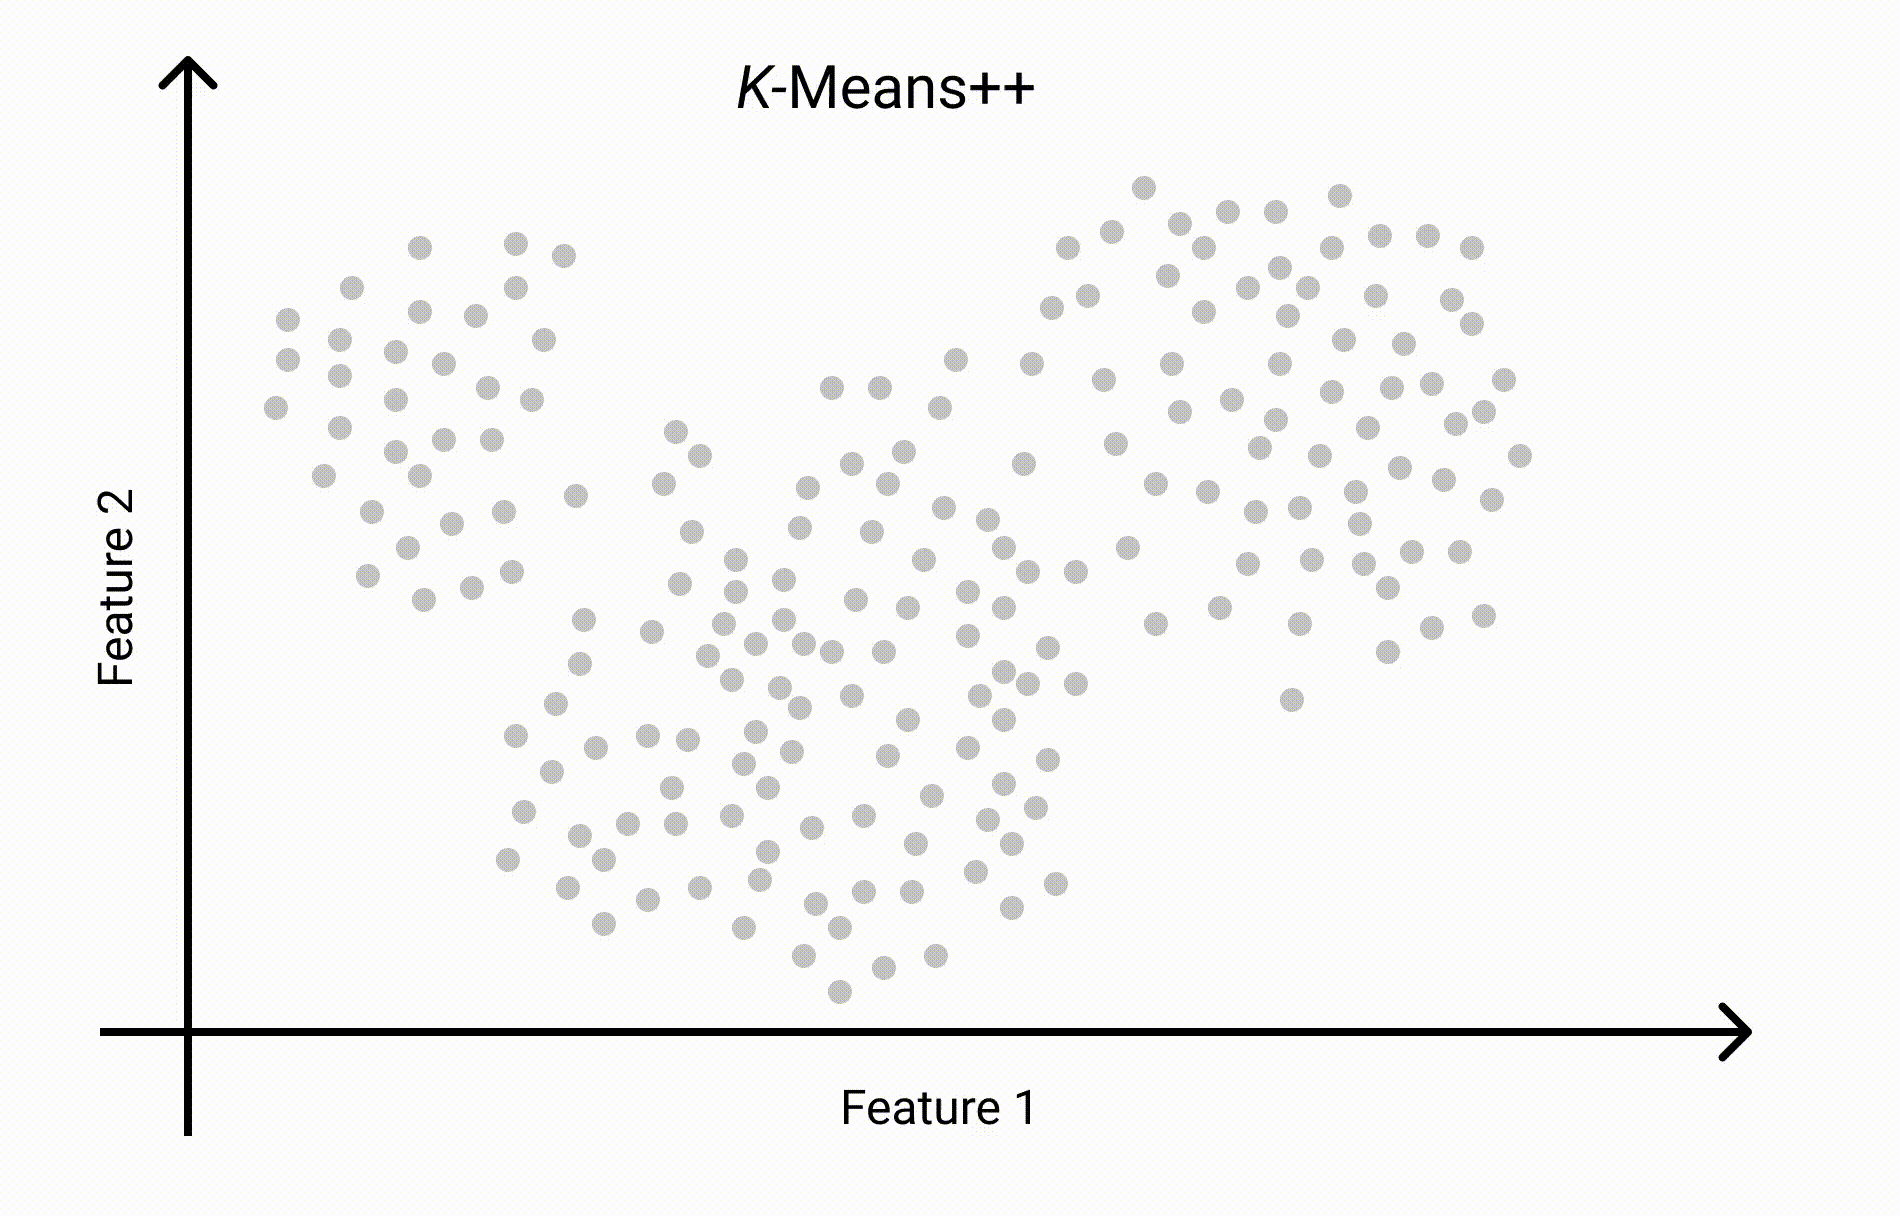</p>
     <figcaption>Figure 4: K-Means++ initialization</figcaption>
    </figure>
</div>

In [16]:
model = KMeans(n_clusters=3, init="k-means++", random_state=99)
model.fit(X)

KMeans(n_clusters=3, random_state=99)

In [17]:
model.inertia_

141.15417813388652

In [18]:
y_pred = model.labels_
centers  = model.cluster_centers_

In [19]:
data.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa


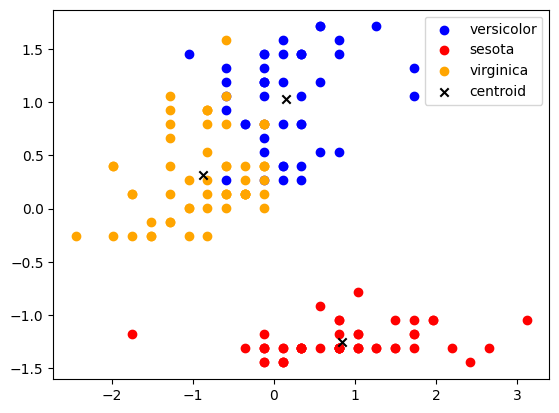

In [21]:
# Plotting
plt.scatter(X[y_pred==0,1],X[y_pred==0,3],c='blue', label = 'versicolor')
plt.scatter(X[y_pred==1,1],X[y_pred==1,3],c='red', label = 'sesota')
plt.scatter(X[y_pred==2,1],X[y_pred==2,3],c='orange',label = 'virginica')

plt.scatter(centers[:,1], centers[:,3], c='black', marker = 'x' ,label = 'centroid')

plt.legend()
plt.show()